In [110]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,Flatten,Reshape
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p



In [111]:
#20% Noise

In [112]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [113]:

#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



In [114]:
Input_train_Dataset

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  2, ...,  0,  0,  0],
        [ 0,  1,  2, ...,  0,  0,  0],
        [ 0,  1,  2, ...,  0,  0,  0]],

       [[ 0,  0,  3, ...,  0,  0,  0],
        [ 6,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0

In [115]:
Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension


In [116]:
Input_train_Dataset

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.00784314, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.00392157, 0.00784314, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.00392157, 0.00784314, ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.01176471, ..., 0.        ,
         0.        , 0.        ],
        [0.02352941, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.00392157, 0.00392157, 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [117]:
noiseFactor=0.2
noisyTrain=Input_train_Dataset+(noiseFactor*np.random.normal(loc=0.0,scale=1.0,size=Input_train_Dataset.shape))
noisyTest=Input_test_Dataset+(noiseFactor*np.random.normal(loc=0.0,scale=1.0,size=Input_test_Dataset.shape))
noisyVal=Input_val_Dataset+(noiseFactor*np.random.normal(loc=0.0,scale=1.0,size=Input_val_Dataset.shape))

In [118]:
noisyTrain

array([[[-0.16985941, -0.06395459, -0.06734255, ...,  0.40668914,
          0.33664612,  0.20357344],
        [ 0.05218392, -0.06497561, -0.02175336, ..., -0.14186651,
         -0.32996463,  0.08690946],
        [-0.26708937,  0.44410173,  0.30376068, ...,  0.32292597,
          0.17354187, -0.06736825],
        ...,
        [-0.45194432,  0.04221852,  0.0605624 , ...,  0.25035263,
         -0.08221431, -0.23106942],
        [ 0.1543252 ,  0.104249  ,  0.10824452, ...,  0.21195322,
          0.07753645, -0.0723826 ],
        [ 0.32436082,  0.00441309, -0.14908675, ...,  0.09578801,
          0.13059262, -0.11690735]],

       [[ 0.12837396,  0.07664183,  0.27670559, ...,  0.24628506,
         -0.03321667,  0.3525873 ],
        [ 0.16456733,  0.00163693, -0.03528494, ..., -0.15073965,
          0.39403145, -0.05540085],
        [ 0.04382942, -0.05859143,  0.17935353, ...,  0.14348678,
         -0.4002346 ,  0.02727124],
        ...,
        [ 0.11050426, -0.20767167, -0.00639738, ..., -

In [119]:
noisyTrain=np.clip(noisyTrain,0,1)
noisyTest=np.clip(noisyTest,0,1)
noisyVal=np.clip(noisyVal,0,1)

In [120]:
noisyTrain

array([[[0.        , 0.        , 0.        , ..., 0.40668914,
         0.33664612, 0.20357344],
        [0.05218392, 0.        , 0.        , ..., 0.        ,
         0.        , 0.08690946],
        [0.        , 0.44410173, 0.30376068, ..., 0.32292597,
         0.17354187, 0.        ],
        ...,
        [0.        , 0.04221852, 0.0605624 , ..., 0.25035263,
         0.        , 0.        ],
        [0.1543252 , 0.104249  , 0.10824452, ..., 0.21195322,
         0.07753645, 0.        ],
        [0.32436082, 0.00441309, 0.        , ..., 0.09578801,
         0.13059262, 0.        ]],

       [[0.12837396, 0.07664183, 0.27670559, ..., 0.24628506,
         0.        , 0.3525873 ],
        [0.16456733, 0.00163693, 0.        , ..., 0.        ,
         0.39403145, 0.        ],
        [0.04382942, 0.        , 0.17935353, ..., 0.14348678,
         0.        , 0.02727124],
        ...,
        [0.11050426, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.5

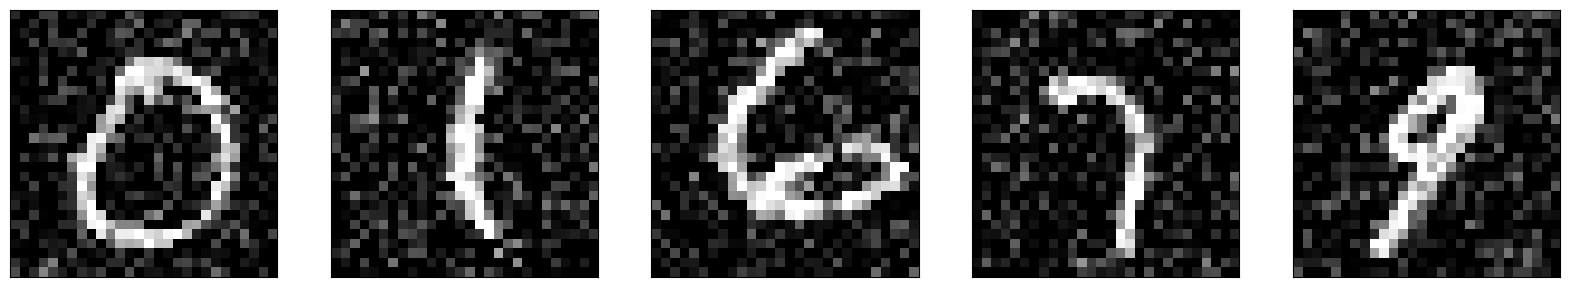

In [121]:
#Noisy Input
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(noisyTrain[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [122]:
encodingDim=256

In [123]:
#Autoencoder Arch-1
xInp=Input(shape=(28,28),name="img")
inp=Flatten(input_shape=(28, 28), name='InputLayer')(xInp)

encodedOut=Dense(encodingDim,activation='sigmoid')(inp)

Encoder1=Model(xInp,encodedOut,name='encoder')


decodedOut=Dense(784,activation='sigmoid')(encodedOut)
out=Reshape((28,28))(decodedOut)
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder1=Model(xInp,out,name='AutoencoderA1')
Autoencoder1.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder1.compile(optimizer, loss='mse',metrics=['accuracy'])
ae1history=Autoencoder1.fit(x = noisyTrain, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(noisyVal,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 784)               201488    
                                                                 
 reshape_4 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
356/356 [=========================

In [124]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr=Autoencoder1.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr[0])

#print('\nEvaluation of model on validation data:')
valErr=Autoencoder1.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr=Autoencoder1.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr[0])


Average reconstruction Loss :
11385/11385 [==============================] - 9s 809us/step - loss: 0.0038 - accuracy: 0.3745
Train Data: 0.003792154835537076
3795/3795 [==============================] - 3s 794us/step - loss: 0.0042 - accuracy: 0.3699
Validation Data: 0.00417903158813715
3795/3795 [==============================] - 3s 796us/step - loss: 0.0042 - accuracy: 0.3724
Test Data: 0.004235267173498869


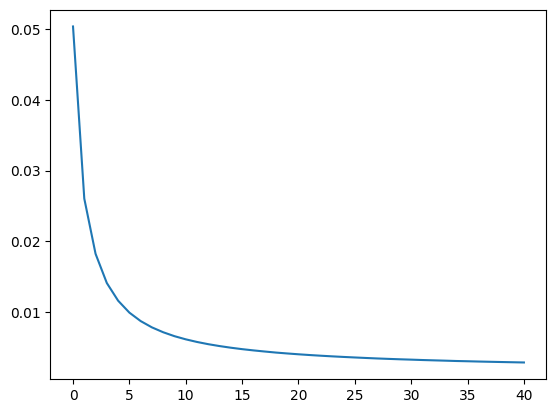

In [125]:
plt.plot(ae1history.history['loss'])

In [126]:
'''visualization-Task2-d'''
trainReconstruct=Autoencoder1.predict(noisyTrain)
testReconstruct=Autoencoder1.predict(noisyTest)
valReconstruct=Autoencoder1.predict(noisyVal)

119/119 [==============================] - 0s 888us/step


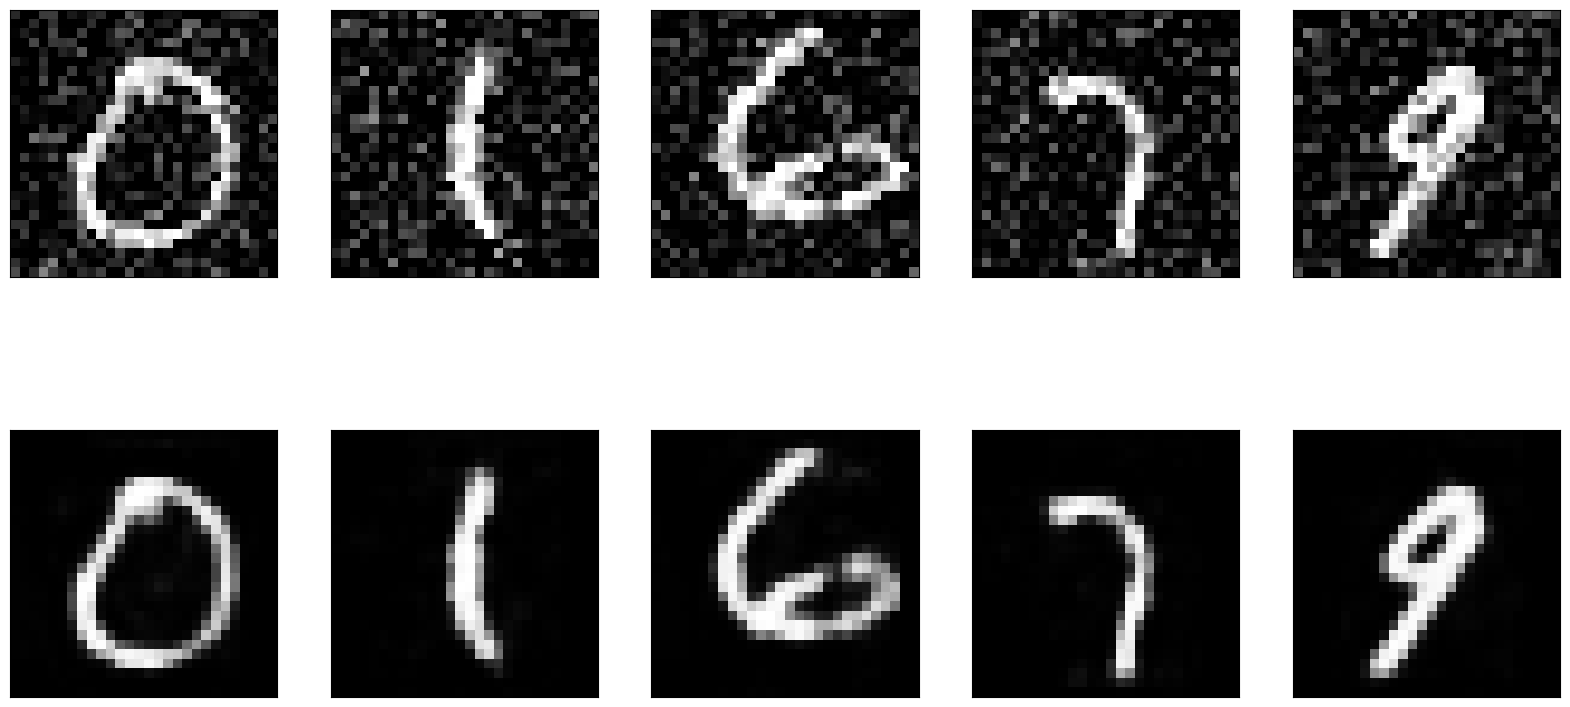

In [127]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(noisyTrain[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


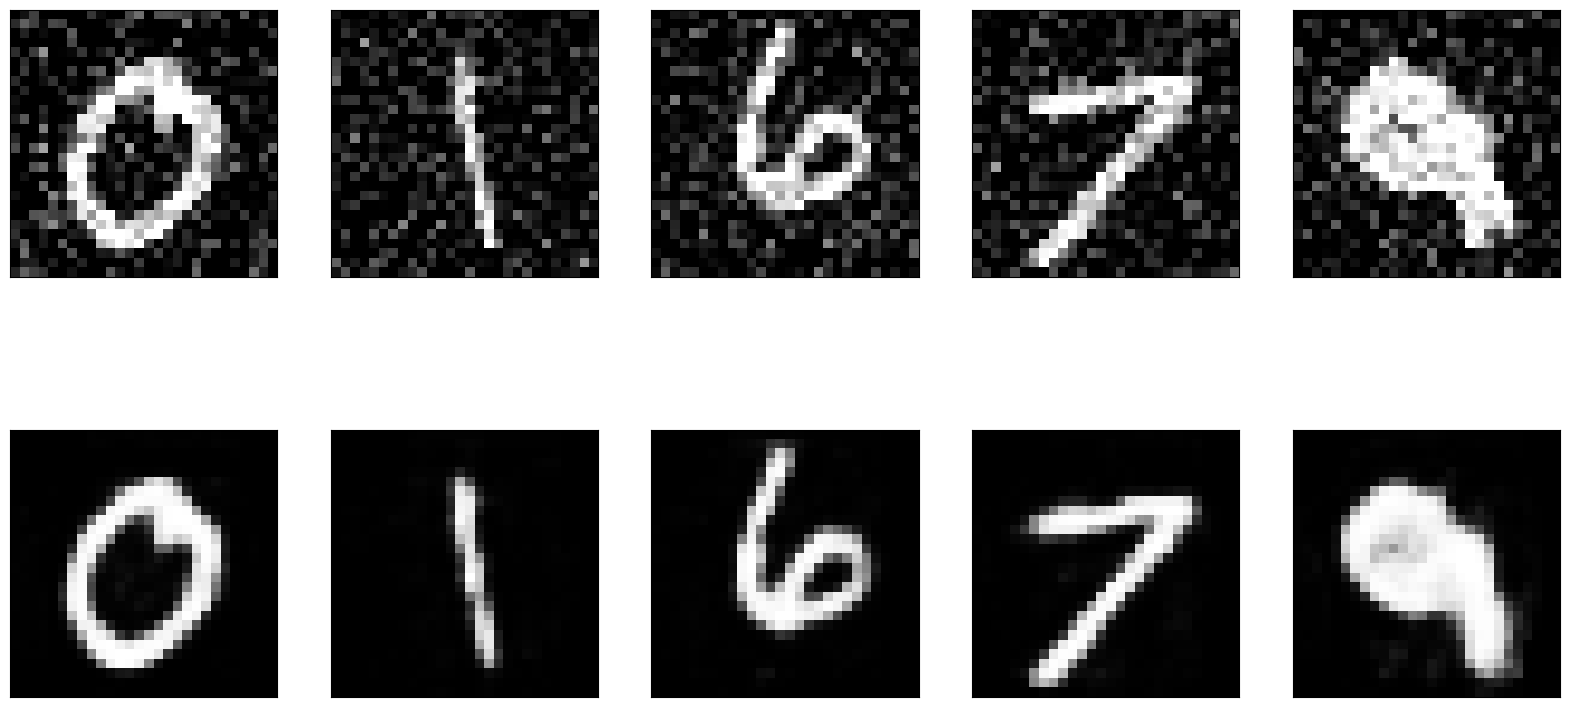

In [128]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(noisyVal[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

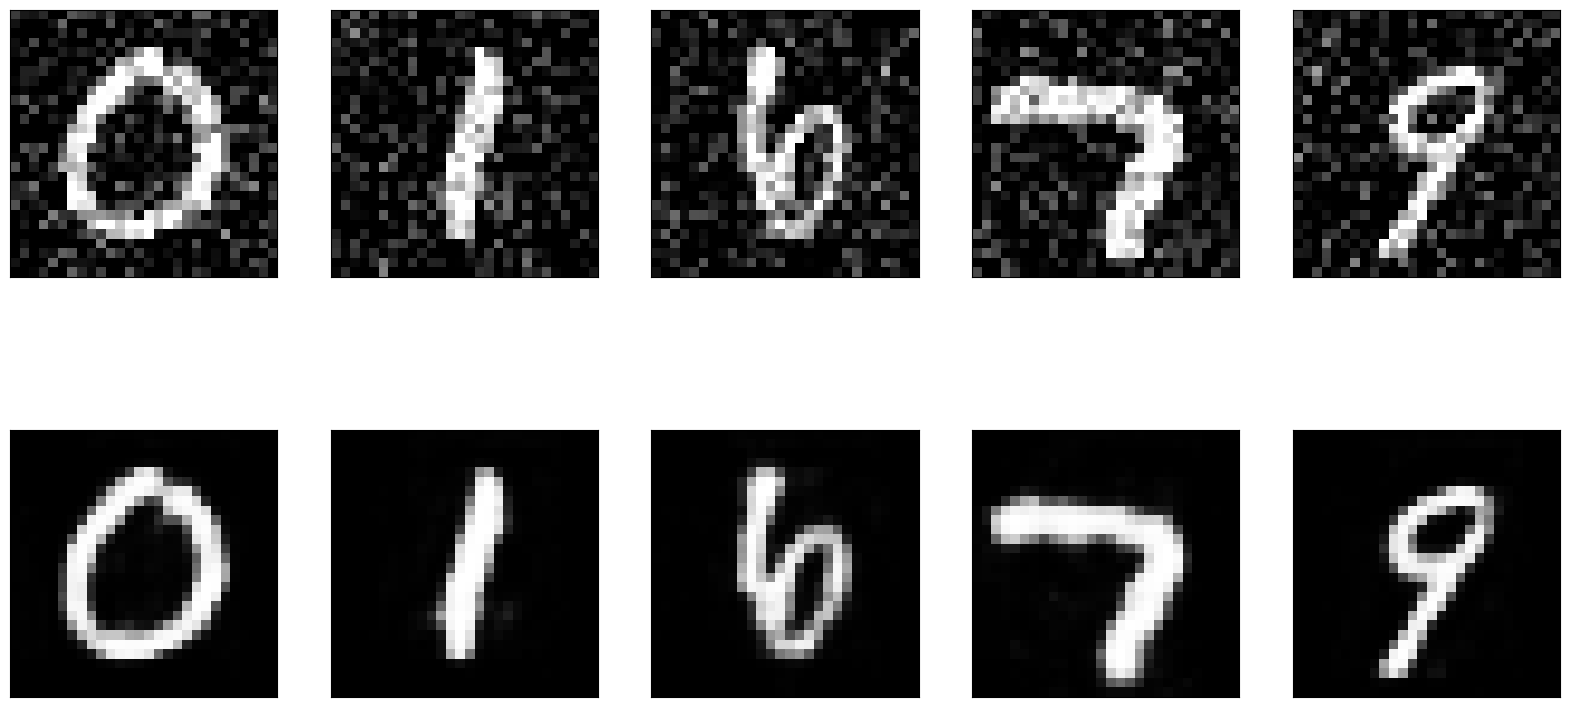

In [129]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(noisyTest[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [130]:
#Task-6
#Since 256 is best encoding dimesion so weight visualization from input to compressed layer:
weights = Autoencoder1.layers[2].get_weights()[0]
print(weights.shape)
print(weights)

(784, 256)
[[-0.02058915 -0.0300076  -0.0049544  ... -0.13174412  0.0895095
  -0.08438148]
 [-0.05872048 -0.08703324 -0.02976658 ...  0.00966543  0.10948509
  -0.05197348]
 [-0.0118119  -0.02494588 -0.1769861  ... -0.04331706  0.14088733
   0.23208714]
 ...
 [ 0.02860458  0.06682985  0.02198602 ... -0.07808006 -0.06244529
   0.30357975]
 [-0.07568055  0.02758211 -0.02284328 ... -0.03560231 -0.04895482
   0.03556186]
 [-0.11009023  0.03537065 -0.09270533 ...  0.05948501 -0.00274965
   0.13187163]]


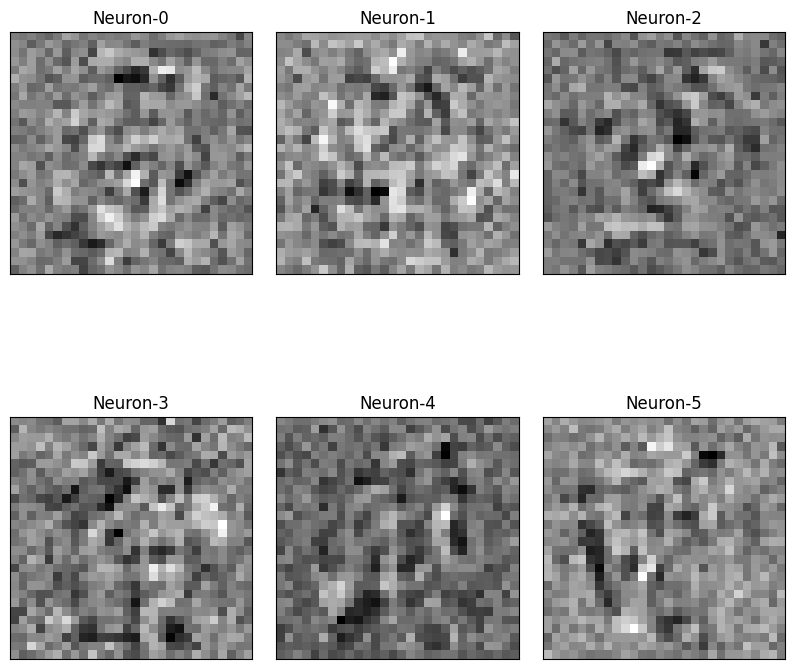

In [131]:
#Visualizing 1st six weights from input to bottleneck layer
n=6
plt.figure(figsize=(10,10))
for i in range(n):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,3,i+1)
    plt.title('Neuron-'+str(i))
    plt.imshow(weights.T[i].reshape(28,28),cmap='gray')
    plt.subplots_adjust(hspace=0, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [132]:
#Task3
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode=Encoder1.predict(noisyTrain)
valEncode=Encoder1.predict(noisyVal)
testEncode=Encoder1.predict(noisyTest)

119/119 [==============================] - 0s 712us/step


In [133]:
#Fcnn
model = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit = model.fit(x = trainEncode, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode,  Output_val), validation_batch_size=1)

model.save('/Users/vds/Downloads/modelAssign4/dae256.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histdae256.pckl','wb')
p.dump(model_fit.history,f)
f.close()

Epoch 1/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.4365 - accuracy: 0.8388 - val_loss: 0.1288 - val_accuracy: 0.9555
Epoch 2/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1255 - accuracy: 0.9585 - val_loss: 0.1058 - val_accuracy: 0.9639
Epoch 3/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1127 - accuracy: 0.9610 - val_loss: 0.0984 - val_accuracy: 0.9628
Epoch 4/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1000 - accuracy: 0.9664 - val_loss: 0.0952 - val_accuracy: 0.9655
Epoch 5/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.0877 - accuracy: 0.9722 - val_loss: 0.0965 - val_accuracy: 0.9679
Epoch 6/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.0796 - accuracy: 0.9741 - val_loss: 0.0965 - val_accuracy: 0.9692
Epoch 7/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0767 - accuracy: 0.9736 - val_loss: 0.0905 -

In [134]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainEncode,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valEncode, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testEncode, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testEncode, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
print(pred)


Evaluation of model on train data:
11385/11385 [==============================] - 9s 773us/step - loss: 0.0101 - accuracy: 0.9959
['loss', 'accuracy']
[0.010089379735291004, 0.9958717823028564]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 772us/step - loss: 0.1173 - accuracy: 0.9736
['loss', 'accuracy']
[0.11726759374141693, 0.9736495614051819]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 763us/step - loss: 0.1114 - accuracy: 0.9787
['loss', 'accuracy']
[0.11140906810760498, 0.9786561131477356]

Predictions for test data:
3795/3795 [==============================] - 3s 676us/step
[4 4 4 ... 1 1 1]


In [135]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix=tf.math.confusion_matrix(Output_test,pred)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix)

tf.Tensor(
[[746   1   8   2   2]
 [  0 755   1   3   0]
 [  5   2 750   0   2]
 [  0   2   2 753   2]
 [  3   5   0  41 710]], shape=(5, 5), dtype=int32)


In [136]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [137]:
noiseFactor=0.4
noisyTrain2=Input_train_Dataset+(noiseFactor*np.random.normal(loc=0.0,scale=1.0,size=Input_train_Dataset.shape))
noisyTest2=Input_test_Dataset+(noiseFactor*np.random.normal(loc=0.0,scale=1.0,size=Input_test_Dataset.shape))
noisyVal2=Input_val_Dataset+(noiseFactor*np.random.normal(loc=0.0,scale=1.0,size=Input_val_Dataset.shape))

In [138]:
noisyTrain2=np.clip(noisyTrain2,0,1)
noisyTest2=np.clip(noisyTest2,0,1)
noisyVal2=np.clip(noisyVal2,0,1)

In [139]:
noisyTrain2

array([[[0.04967958, 1.        , 0.        , ..., 0.        ,
         0.30329438, 0.        ],
        [0.78156038, 0.40906814, 0.        , ..., 0.        ,
         0.1898767 , 0.        ],
        [0.        , 0.        , 0.03047802, ..., 0.1406206 ,
         0.        , 0.        ],
        ...,
        [0.        , 0.57196441, 0.        , ..., 0.62905915,
         0.        , 0.69971174],
        [0.        , 0.30773207, 0.93587862, ..., 0.27617597,
         0.        , 0.0709131 ],
        [0.89949372, 0.        , 0.21071764, ..., 0.45503636,
         0.        , 0.21342535]],

       [[0.78196866, 0.        , 0.        , ..., 0.44851477,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.02979424, 0.46110375],
        [0.        , 0.47042217, 0.13826445, ..., 0.        ,
         0.1612027 , 0.36909637],
        ...,
        [0.        , 0.45440455, 0.2743642 , ..., 0.14011295,
         0.30670862, 0.        ],
        [0.0

In [140]:
#Autoencoder Arch-2
xInp2=Input(shape=(28,28),name="img")
inp2=Flatten(input_shape=(28, 28), name='InputLayer')(xInp2)

encodedOut2=Dense(encodingDim,activation='sigmoid')(inp2)

Encoder2=Model(xInp2,encodedOut2,name='encoder')


decodedOut2=Dense(784,activation='sigmoid')(encodedOut2)
out2=Reshape((28,28))(decodedOut2)
optimizer2=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder2=Model(xInp2,out2,name='AutoencoderA1')
Autoencoder2.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder2.compile(optimizer2, loss='mse',metrics=['accuracy'])
ae2history=Autoencoder2.fit(x = noisyTrain2, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(noisyVal2,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 784)               201488    
                                                                 
 reshape_5 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
356/356 [=========================

356/356 [==============================] - 1s 3ms/step - loss: 0.0052 - accuracy: 0.3493 - val_loss: 0.0102 - val_accuracy: 0.3251
Epoch 51/1000
356/356 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 0.3496 - val_loss: 0.0102 - val_accuracy: 0.3243
Epoch 52/1000
356/356 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 0.3498 - val_loss: 0.0102 - val_accuracy: 0.3252
Epoch 53/1000
356/356 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 0.3500 - val_loss: 0.0103 - val_accuracy: 0.3252
Epoch 54/1000
356/356 [==============================] - 1s 3ms/step - loss: 0.0050 - accuracy: 0.3503 - val_loss: 0.0103 - val_accuracy: 0.3249
Epoch 55/1000
356/356 [==============================] - 1s 3ms/step - loss: 0.0050 - accuracy: 0.3503 - val_loss: 0.0103 - val_accuracy: 0.3250
Epoch 56/1000
356/356 [==============================] - 1s 3ms/step - loss: 0.0049 - accuracy: 0.3504 - val_loss: 0.0103 - val_accuracy: 0.3245

In [141]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr2=Autoencoder2.evaluate(noisyTrain2,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr2[0])

#print('\nEvaluation of model on validation data:')
valErr2=Autoencoder2.evaluate(x=noisyVal2, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr2[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr2=Autoencoder2.evaluate(x=noisyTest2, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr2[0])


Average reconstruction Loss :
11385/11385 [==============================] - 9s 766us/step - loss: 0.0046 - accuracy: 0.3512
Train Data: 0.0046155694872140884
3795/3795 [==============================] - 3s 769us/step - loss: 0.0105 - accuracy: 0.3233
Validation Data: 0.01047145389020443
3795/3795 [==============================] - 3s 783us/step - loss: 0.0107 - accuracy: 0.3240
Test Data: 0.01069389283657074


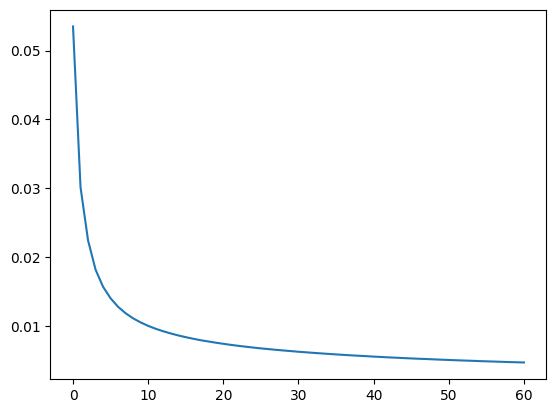

In [142]:
plt.plot(ae2history.history['loss'])

In [143]:
'''visualization-Task2-d'''
trainReconstruct2=Autoencoder2.predict(noisyTrain2)
testReconstruct2=Autoencoder2.predict(noisyTest2)
valReconstruct2=Autoencoder2.predict(noisyVal2)

119/119 [==============================] - 0s 918us/step


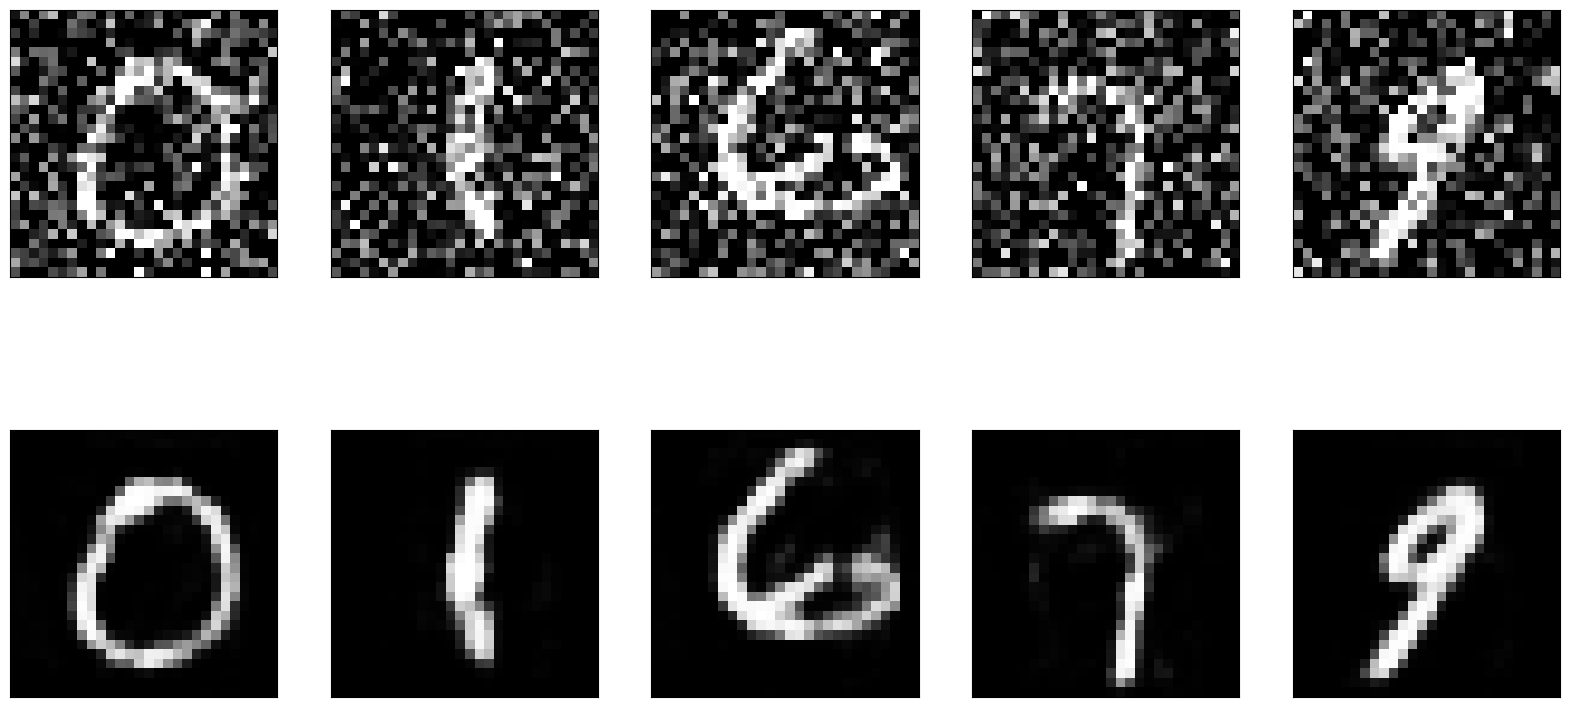

In [144]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(noisyTrain2[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


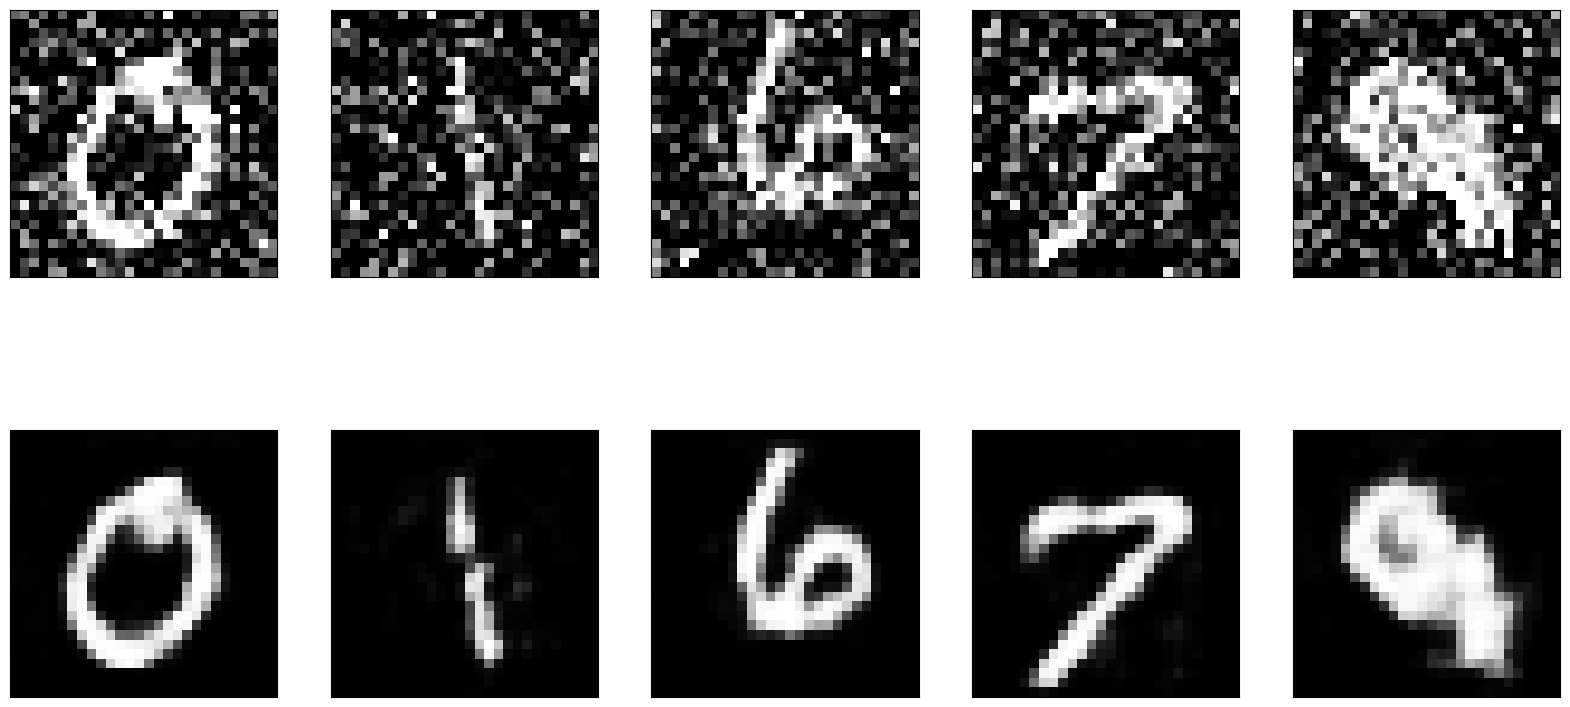

In [145]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(noisyVal2[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

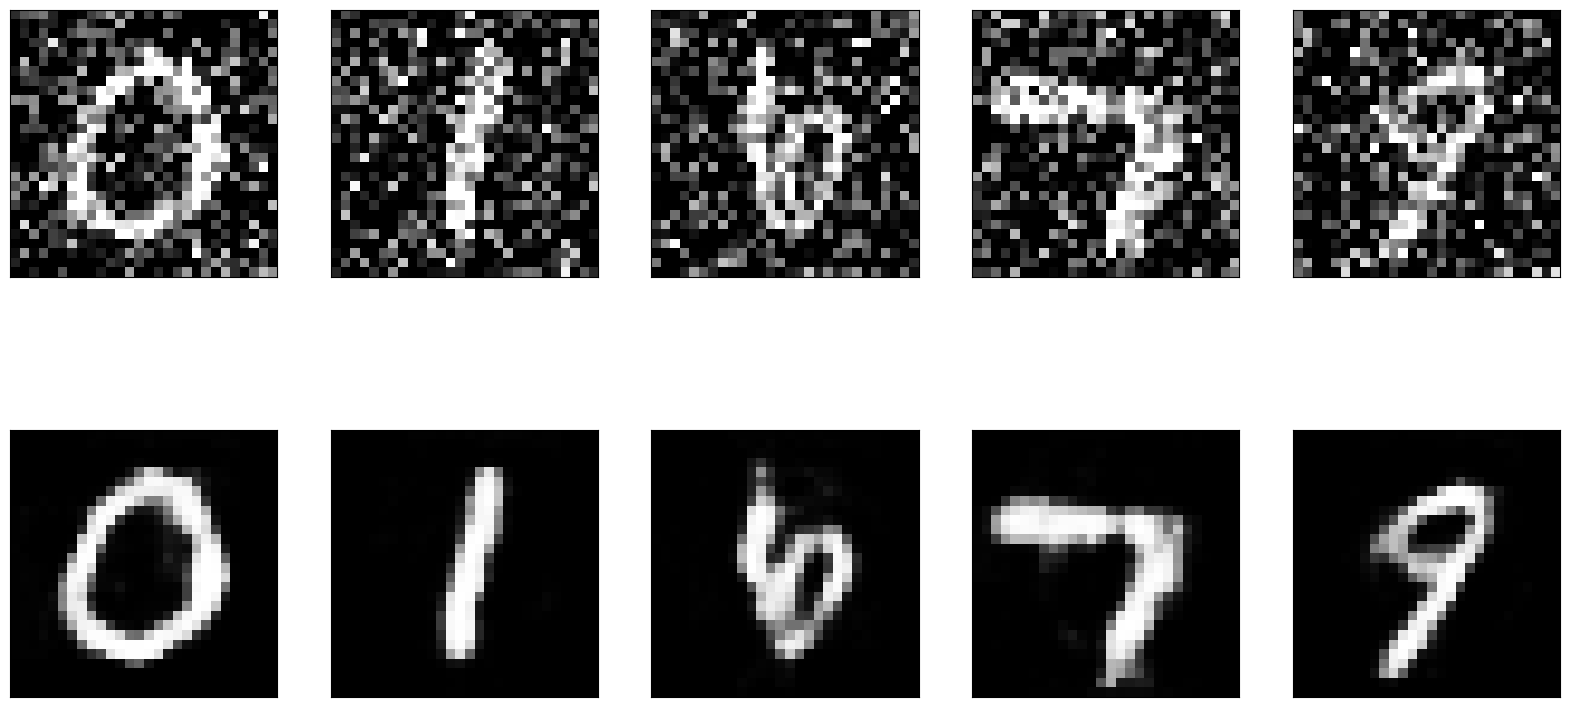

In [146]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(noisyTest2[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [147]:
#Task-6
#Since 256 is best encoding dimesion so weight visualization from input to compressed layer:
weights2 = Autoencoder2.layers[2].get_weights()[0]
print(weights2.shape)
print(weights2)

(784, 256)
[[-0.08786552  0.13837141  0.05067452 ... -0.5461188   0.1231166
  -0.03399735]
 [ 0.03021847  0.08233481 -0.25189272 ... -0.08437012 -0.37632182
   0.12125777]
 [-0.15598916  0.21256664 -0.06284991 ...  0.04386826  0.17682809
   0.10829688]
 ...
 [ 0.10642073 -0.16419077  0.19713287 ...  0.15321538  0.0108298
  -0.13513495]
 [ 0.01303721  0.35694408  0.06878788 ...  0.03735299 -0.15025839
   0.22695893]
 [-0.13332546  0.4195772   0.00340448 ...  0.26438153  0.00340084
   0.16151737]]


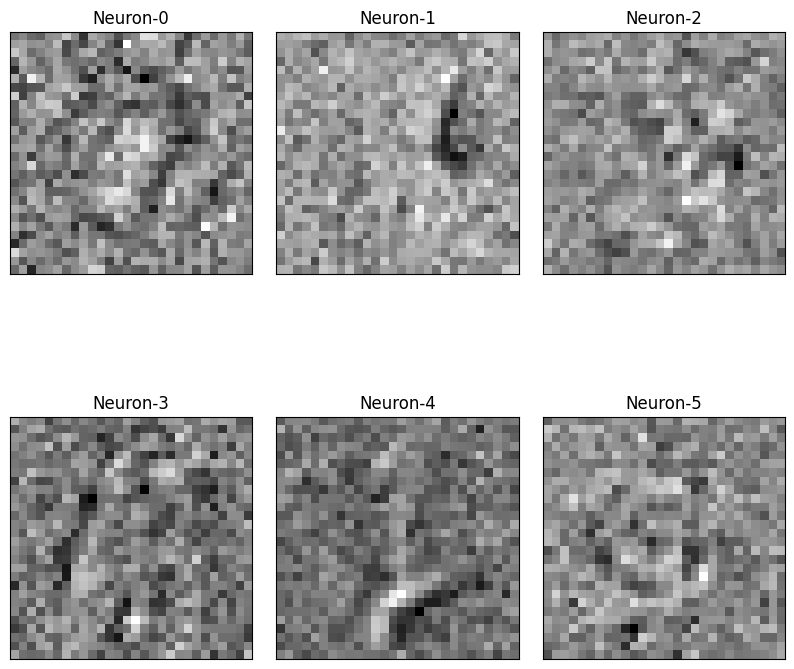

In [148]:
#Visualizing 1st six weights from input to bottleneck layer
n=6
plt.figure(figsize=(10,10))
for i in range(n):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,3,i+1)
    plt.title('Neuron-'+str(i))
    plt.imshow(weights2.T[i].reshape(28,28),cmap='gray')
    plt.subplots_adjust(hspace=0, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [149]:
#Task3
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode2=Encoder2.predict(noisyTrain2)
valEncode2=Encoder2.predict(noisyVal2)
testEncode2=Encoder2.predict(noisyTest2)

119/119 [==============================] - 0s 731us/step


In [150]:
#Fcnn
model2 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model2.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit2 = model2.fit(x = trainEncode2, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode2,  Output_val), validation_batch_size=1)

model2.save('/Users/vds/Downloads/modelAssign4/ae128.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae128.pckl','wb')
p.dump(model_fit2.history,f)
f.close()

Epoch 1/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.3842 - accuracy: 0.8620 - val_loss: 0.1468 - val_accuracy: 0.9468
Epoch 2/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1447 - accuracy: 0.9500 - val_loss: 0.1503 - val_accuracy: 0.9484
Epoch 3/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1142 - accuracy: 0.9611 - val_loss: 0.1655 - val_accuracy: 0.9465
Epoch 4/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1140 - accuracy: 0.9616 - val_loss: 0.1284 - val_accuracy: 0.9552
Epoch 5/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0968 - accuracy: 0.9679 - val_loss: 0.1438 - val_accuracy: 0.9528
Epoch 6/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0926 - accuracy: 0.9686 - val_loss: 0.1213 - val_accuracy: 0.9599
Epoch 7/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0816 - accuracy: 0.9727 - val_loss: 0.1157 -

In [151]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc2=model2.evaluate(x=trainEncode2,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(trainAcc2)

print('\nEvaluation of model on validation data:')
valAcc2=model2.evaluate(x=valEncode2, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(valAcc2)

print('\nEvaluation of model on test data:')
testAcc2=model2.evaluate(x=testEncode2, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(testAcc2)

print('\nPredictions for test data:')
testProb2=model2.predict(testEncode2, batch_size=1, verbose="auto", callbacks=None)
pred2=np.argmax(testProb2,axis=1)
print(pred2)


Evaluation of model on train data:
11385/11385 [==============================] - 9s 796us/step - loss: 0.0021 - accuracy: 0.9994
['loss', 'accuracy']
[0.002071148483082652, 0.9993851780891418]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 794us/step - loss: 0.1373 - accuracy: 0.9726
['loss', 'accuracy']
[0.1373249888420105, 0.9725955128669739]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 802us/step - loss: 0.1464 - accuracy: 0.9718
['loss', 'accuracy']
[0.14637491106987, 0.9718050360679626]

Predictions for test data:
3795/3795 [==============================] - 3s 669us/step
[4 4 4 ... 1 1 1]


In [152]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix2=tf.math.confusion_matrix(Output_test,pred2)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix2)

tf.Tensor(
[[740   1  11   4   3]
 [  0 754   3   2   0]
 [  8   6 743   1   1]
 [  1   8   4 732  14]
 [  4   8   1  27 719]], shape=(5, 5), dtype=int32)
